In [ ]:
import pandas as pd
import numpy as np
importimport edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [15]:
from scipy.optimize import minimize
def msr(risk_free_rate, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    
    def neg_sharpe_ratio(weights, cov,er, risk_free_rate=risk_free_rate):
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - risk_free_rate) / vol
    
    
    
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(cov,er, risk_free_rate), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds)
    return results.x

In [16]:
msr(0.03, er, cov)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.10172559e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.13649585e-01,
       2.09207807e-16, 7.13566110e-17, 6.95441266e-16, 0.00000000e+00,
       0.00000000e+00, 6.45316705e-02, 2.06334128e-16, 3.32826553e-16,
       4.33997729e-16, 7.23306159e-02, 9.72385801e-17, 3.10738739e-01,
       0.00000000e+00, 5.93677102e-16, 6.98367582e-02, 0.00000000e+00,
       6.44830243e-16, 0.00000000e+00, 1.68912632e-01, 0.00000000e+00,
       4.48330269e-16, 0.00000000e+00])

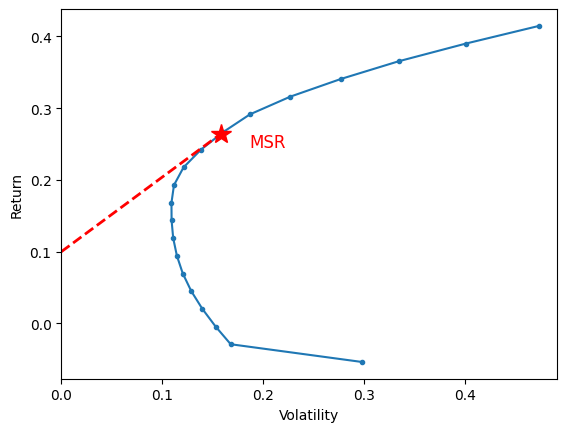

In [17]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf=0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# Add the MSR to the plot
ax.plot(vol_msr, r_msr, 'r*', markersize=15.0)
ax.annotate("MSR", xy=(vol_msr, r_msr),
            xytext=(20, -10), textcoords='offset points',
            fontsize=12, color='red')
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, 'r--', linewidth=2)


<Axes: xlabel='Volatility', ylabel='Return'>

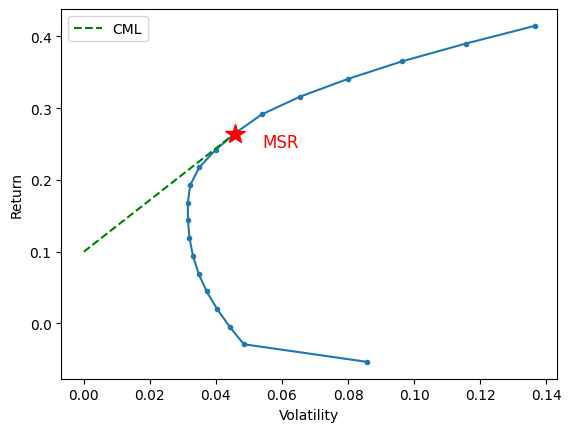

In [2]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1)

In [9]:
l = ["Food","Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

In [13]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [7]:
erk.msr(0.1, np.array([0.11,0.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

<Axes: xlabel='Volatility', ylabel='Return'>

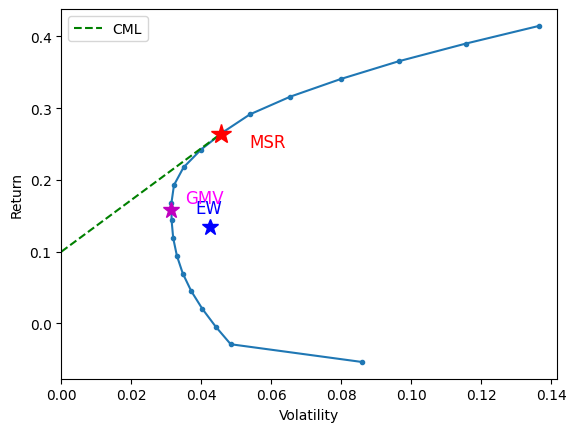

In [10]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1, show_ew=True, show_gmv=True)